# Bike Sharing Assignment

 - The company wants to know:

 -   Which variables are significant in predicting the demand for shared bikes.
 -  How well those variables describe the bike demands.



The Solution is divided into the following sections:

-  Data Understanding and exploration
-  Data Visualisation
-  Data Preparation
-  Model building and evaluation


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [52]:
# loading the data and understanding the variables 
Bike_df = pd.read_csv('day.csv')

### Inspecting the Data

In [5]:
# Checking the first 5 rows using Head
Bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Shape of the bike data
Bike_df.shape

(730, 16)

In [11]:
# Describing the columns of the bike data frame
Bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
# Informartion of the bike data frame to know type of the column
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [53]:
# we already have yr and month columns. so,dteday in not required
Bike_df.drop(['dteday','instant','registered','casual'],axis=1,inplace=True)
Bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# EDA 

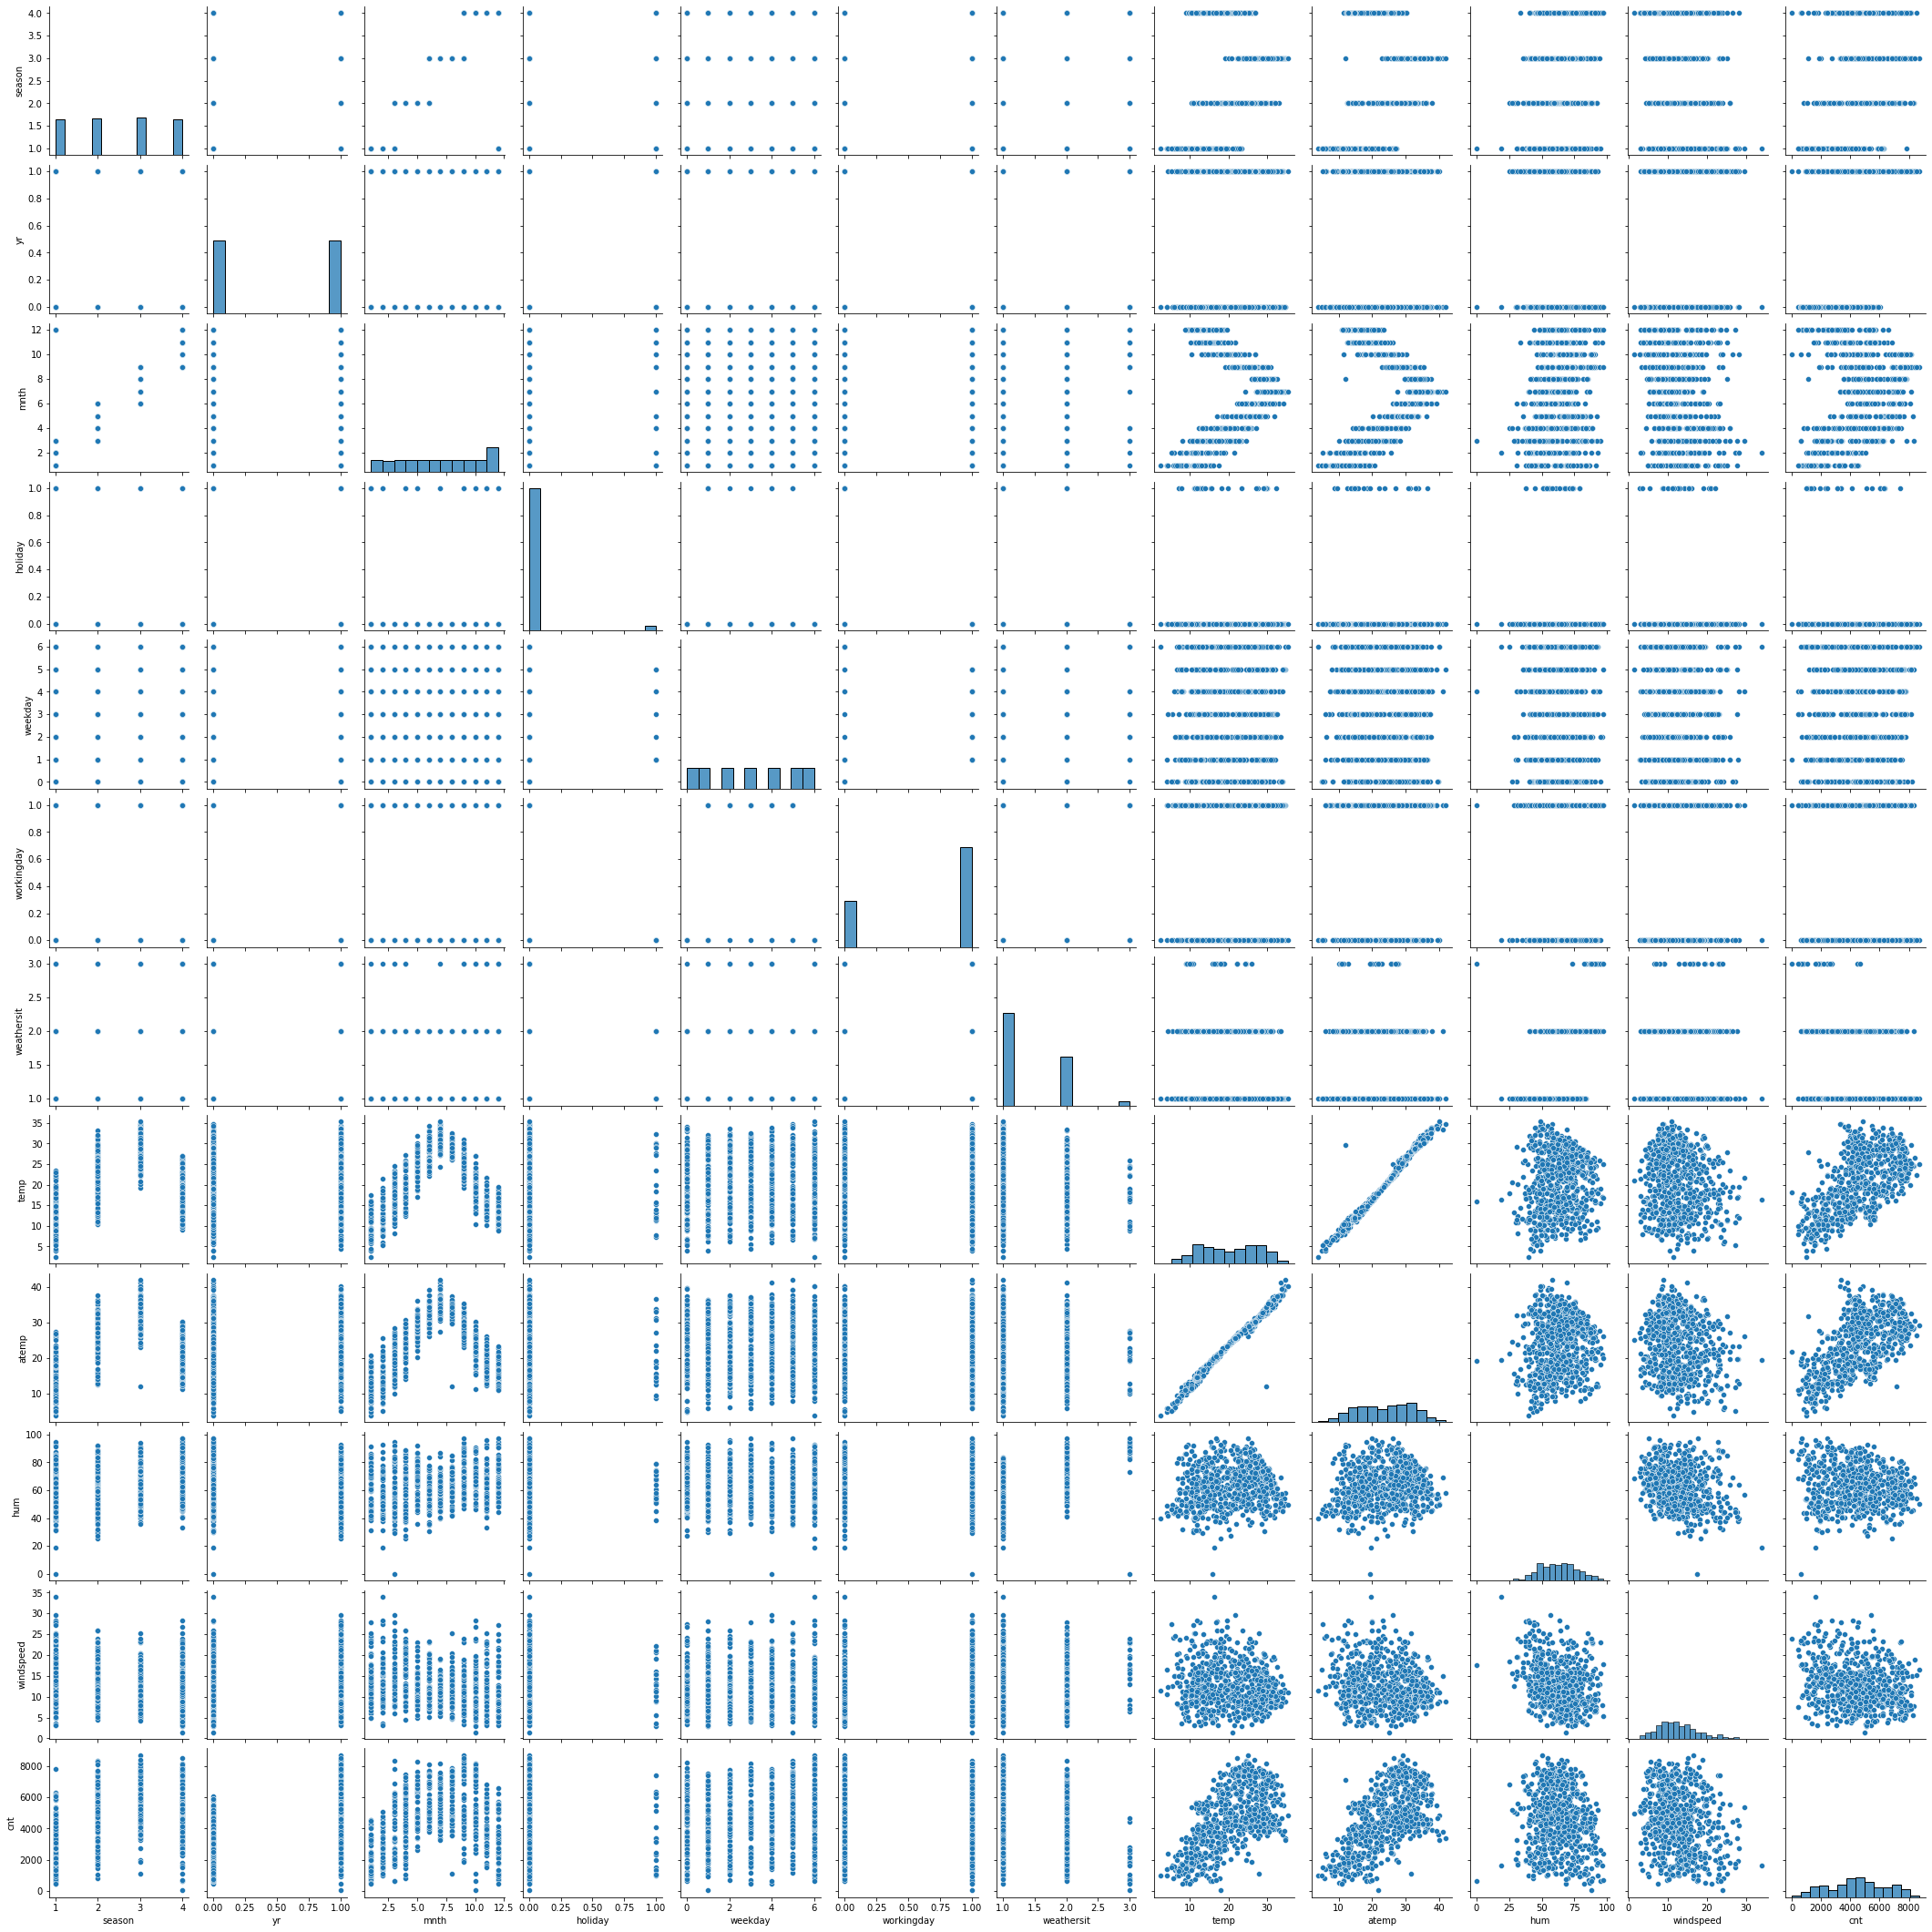

In [14]:
#visualising the numeric values
sns.pairplot(Bike_df)
plt.show()

In [23]:
#checking the values of the season.
Bike_df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [54]:
# According the data given converting season variable to categorical values.
Bike_df['season'] = Bike_df[['season']].apply(lambda x : x.map({1:"spring",2:"summer",3:"fall",4:"winter"}))
Bike_df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [55]:
# Conveting numerical value intothe weekday column
Bike_df['weekday'] = Bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [18]:
Bike_df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [56]:
# Converting numerical value into the Categorical variable.
Bike_df['weathersit'] = Bike_df[['weathersit']].apply(lambda x : x.map({1:"good",2:"moderate",3:"bad",4:"heavy"}))
Bike_df['weathersit']

0      moderate
1      moderate
2          good
3          good
4          good
         ...   
725    moderate
726    moderate
727    moderate
728        good
729    moderate
Name: weathersit, Length: 730, dtype: object

In [27]:
Bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [57]:
# According to the given data converting numerical value into the Categorical variable.
Bike_df['mnth'] = Bike_df[['mnth']].apply(lambda x : x.map({1:"January",2:"February",3:"March",4:"April",5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}))
Bike_df['mnth']

0       January
1       January
2       January
3       January
4       January
         ...   
725    December
726    December
727    December
728    December
729    December
Name: mnth, Length: 730, dtype: object

In [30]:
# checking the values counts
Bike_df['mnth'].value_counts()

July         62
March        62
October      62
August       62
January      62
May          62
December     62
June         60
April        60
September    60
November     60
February     56
Name: mnth, dtype: int64

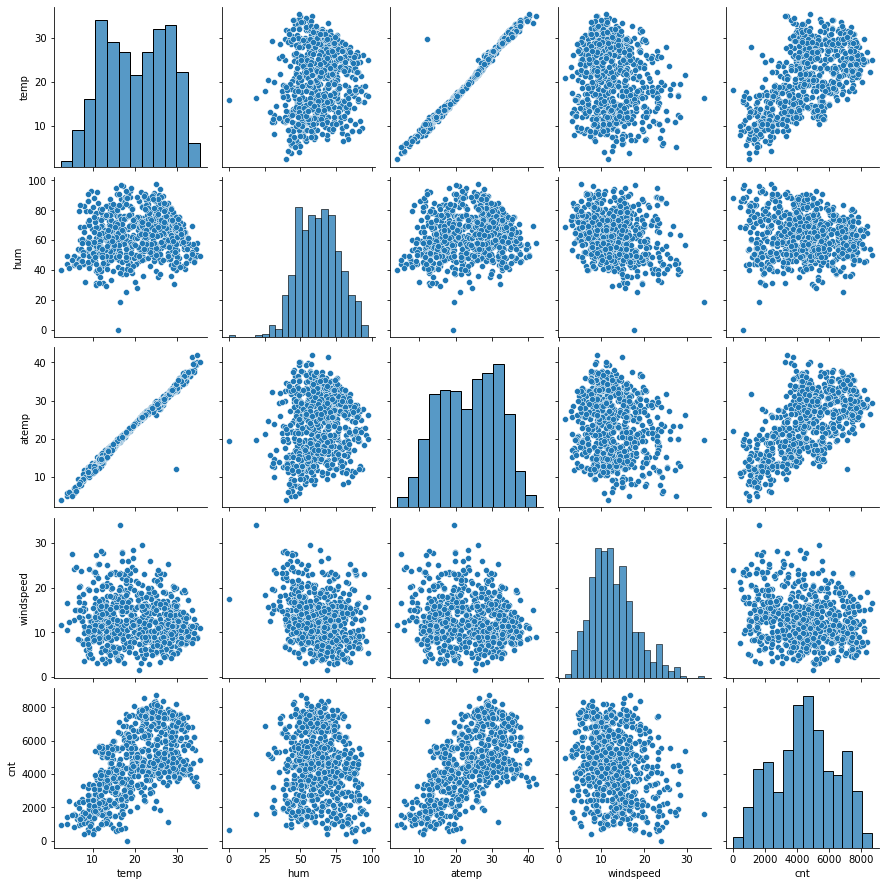

In [31]:
 #Pairplot of numerical variables
sns.pairplot(Bike_df, vars=['temp','hum','atemp','windspeed',"cnt"])
plt.show()

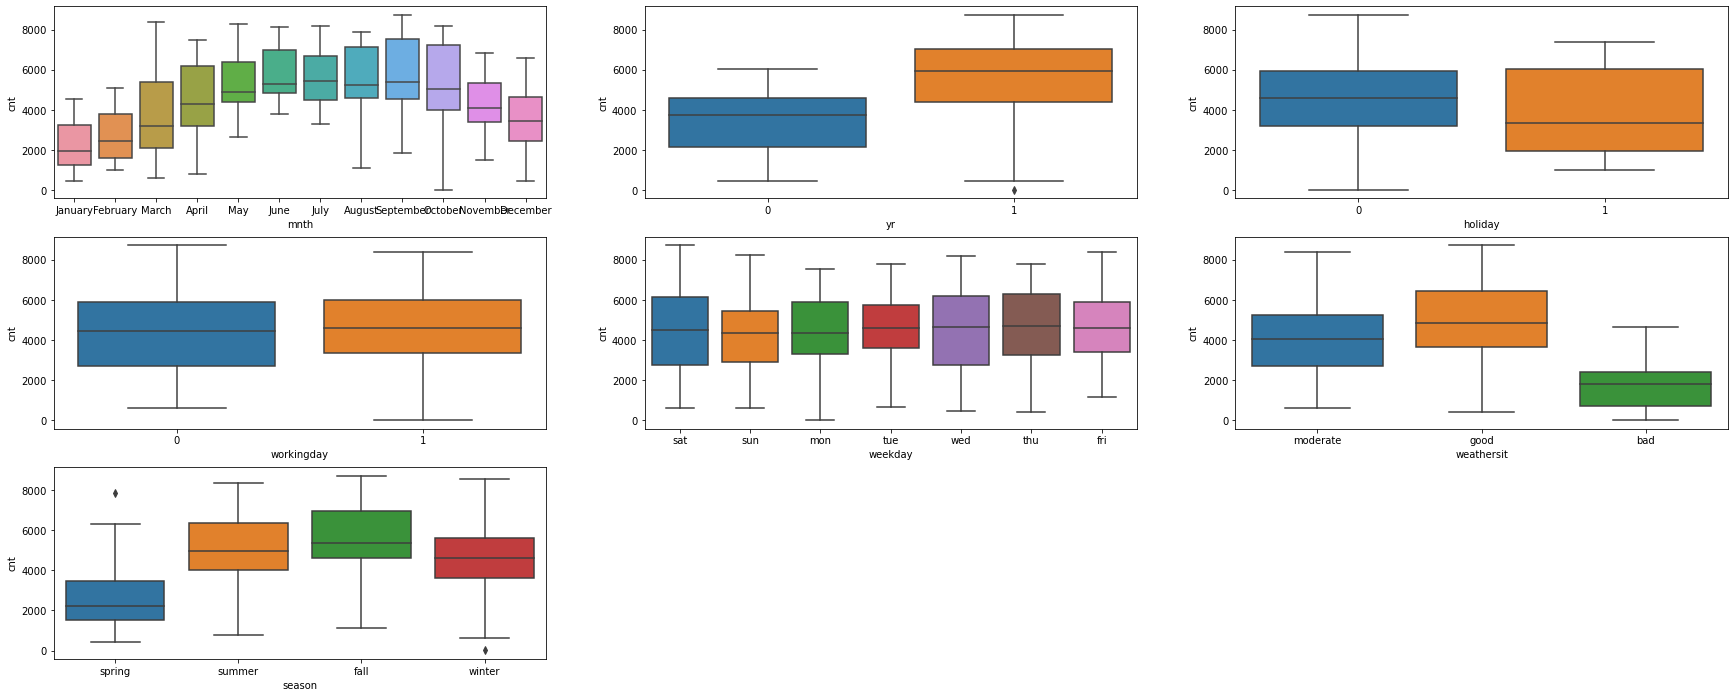

In [33]:
# Boxplot of categorical variables
plt.figure(figsize=(30, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike_df)
plt.show()


#### Insights¶

    The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'



### Data Preparation

In [58]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(Bike_df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(Bike_df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(Bike_df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(Bike_df.season,drop_first=True)

In [41]:
months_df.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [59]:
Bike_df=pd.get_dummies(data=Bike_df,drop_first=True)

Bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


In [61]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  mnth_August          730 non-null    uint8  
 12  mnth_December        730 non-null    uint8  
 13  mnth_February        730 non-null    uint8  
 14  mnth_January         730 non-null    uint8  
 15  mnth_July            730 non-null    uin

In [62]:
Bike_df.shape

(730, 30)

### Training Test Split

In [67]:
df_train, df_test = train_test_split(Bike_df, train_size = 0.7, random_state = 100)

In [68]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [69]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

### Scaling 

In [70]:
# normalisation = (x- xmin)/(xmax-xmin)
# standarisation  = (x - mu)/sigma
# 1. Instantiate an object.
scaler = MinMaxScaler()

In [71]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

bike_vars = ['temp','hum','windspeed','workingday']
df_train[bike_vars] = scaler.fit_transform(df_train[bike_vars])

In [72]:
df_train.describe(include='all')

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,23.500287,0.650480,0.320883,4485.337255,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098
std,0.500429,0.157763,0.468282,0.225858,8.090963,0.145846,0.169803,1950.666077,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,16.603063,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,24.131150,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,30.177700,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
# scaler.fit
df_train[bike_vars]

,temp,hum,windspeed,workingday
576,0.815169,0.725633,0.264686,1.0
426,0.442393,0.640189,0.255342,0.0
728,0.245101,0.498067,0.663106,0.0
482,0.395666,0.504508,0.188475,0.0
111,0.345824,0.751824,0.380981,1.0
...,...,...,...,...
578,0.863973,0.679690,0.187140,1.0
53,0.202618,0.435939,0.111379,1.0
350,0.248216,0.577930,0.431816,0.0
79,0.462664,0.759870,0.529881,1.0


In [75]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1.0,0.815169,33.1448,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0.0,0.442393,20.6746,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0.0,0.245101,11.5850,0.498067,0.663106,1796,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0.0,0.395666,18.8752,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1.0,0.345824,16.0977,0.751824,0.380981,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [76]:
# 2. Fit on data
df_train[bike_vars] = scaler.fit_transform(df_train[bike_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1.0,0.815169,33.1448,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0.0,0.442393,20.6746,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0.0,0.245101,11.5850,0.498067,0.663106,1796,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0.0,0.395666,18.8752,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1.0,0.345824,16.0977,0.751824,0.380981,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


### Training the model

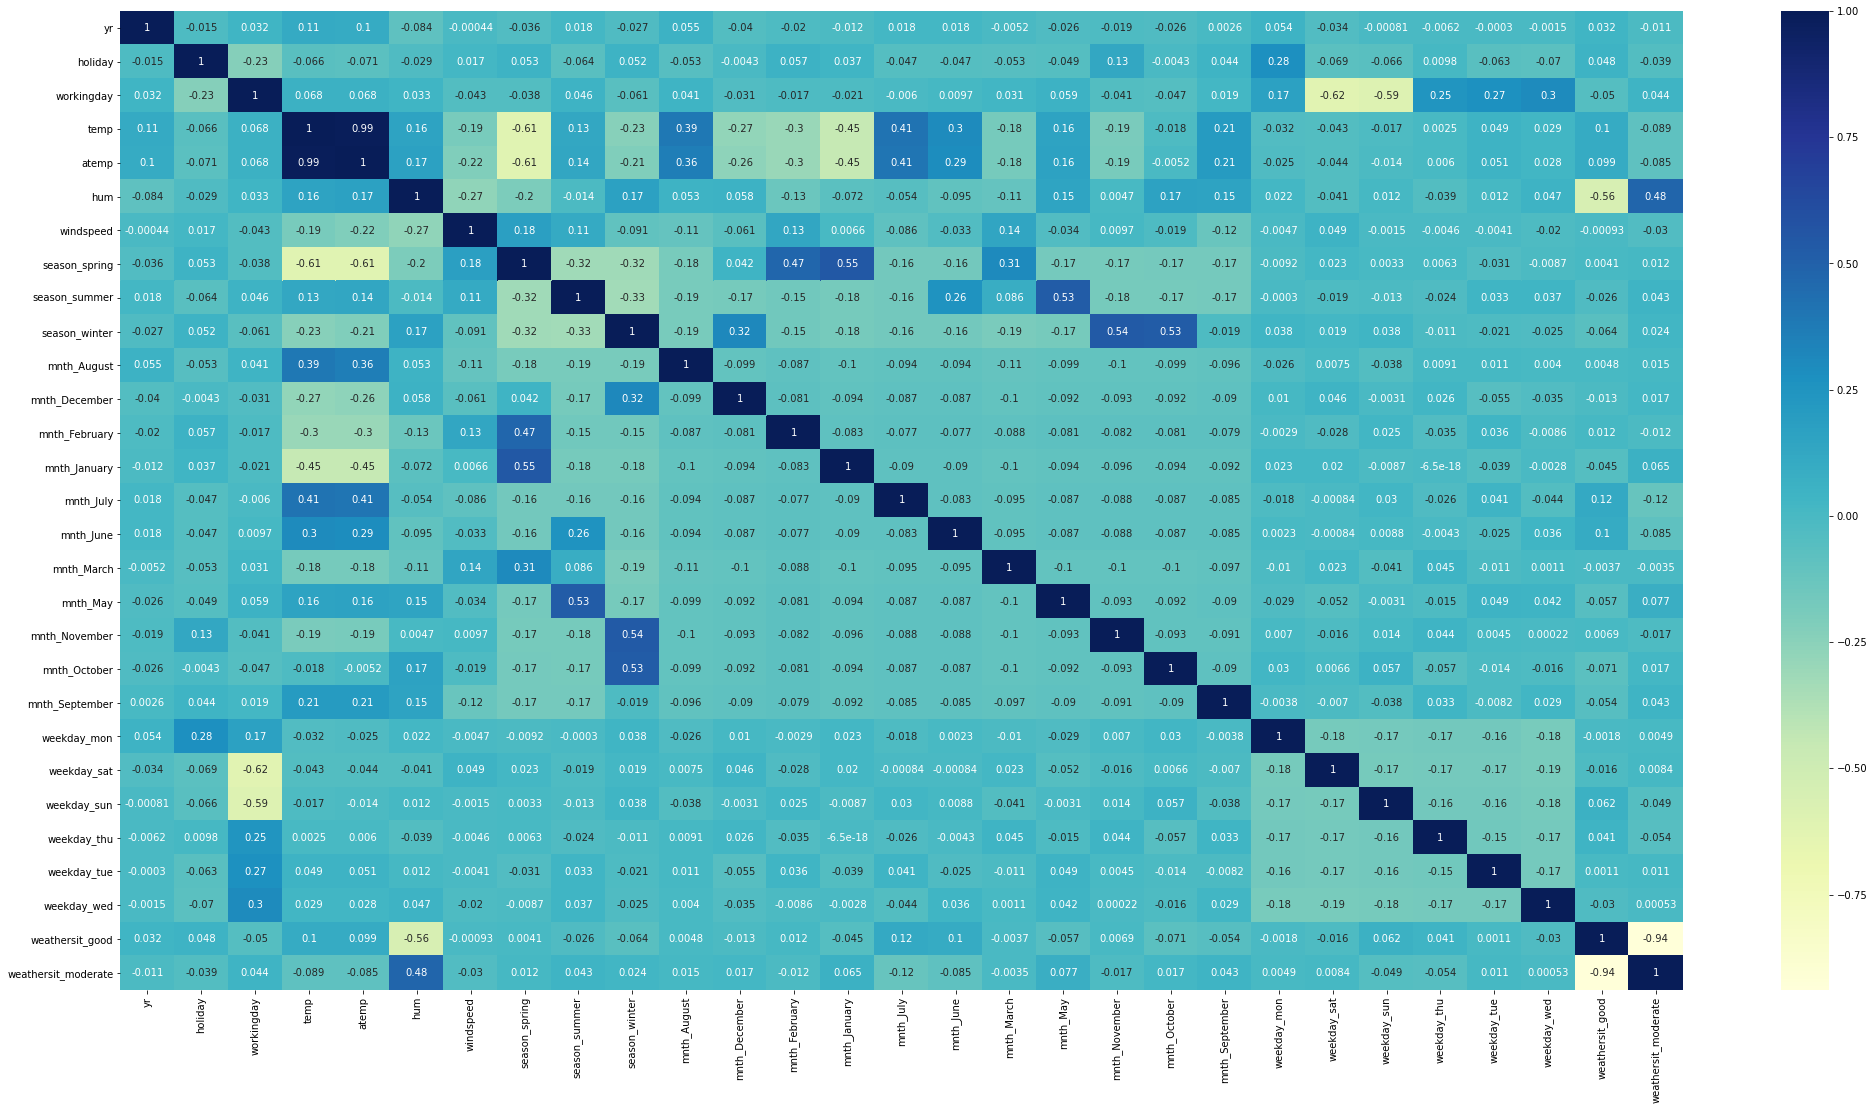

In [120]:
#heatmap
plt.figure(figsize=(35,18))
sns.heatmap(df_train.corr(),annot = True,cmap = 'YlGnBu')
plt.show()

###### Insights:

  -  The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
    
  -  We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.



In [78]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1.0,0.815169,33.1448,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0.0,0.442393,20.6746,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0.0,0.245101,11.5850,0.498067,0.663106,1796,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0.0,0.395666,18.8752,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1.0,0.345824,16.0977,0.751824,0.380981,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [79]:
# X_train , y_train

y_train = df_train.pop('cnt')
X_train = df_train

In [80]:
# Build a Linear Regression model using SKLearn for RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [81]:
X_train.shape

(510, 29)

In [83]:
#Cut down number of features to 15 using automated approach
from sklearn.feature_selection import RFE

rfe = RFE(lr,step= 15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=15)

In [84]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 2),
 ('mnth_December', True, 1),
 ('mnth_February', False, 2),
 ('mnth_January', True, 1),
 ('mnth_July', False, 2),
 ('mnth_June', False, 2),
 ('mnth_March', False, 2),
 ('mnth_May', False, 2),
 ('mnth_November', True, 1),
 ('mnth_October', False, 2),
 ('mnth_September', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 2),
 ('weekday_thu', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [85]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_December', 'mnth_January',
       'mnth_November', 'mnth_September', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [86]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_August', 'mnth_February', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_October', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [87]:
# Taking columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_December', 'mnth_January',
       'mnth_November', 'mnth_September', 'weathersit_good',
       'weathersit_moderate']]

In [94]:
X_train_rfe.shape

(510, 14)

### Build Model


In [95]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.5
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          5.38e-188
Time:                        20:53:27   Log-Likelihood:                -4116.3
No. Observations:                 510   AIC:                             8263.
Df Residuals:                     495   BIC:                             8326.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 532.1215    

In [96]:
vif = pd.DataFrame()
vif['Features']  = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif  = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
2,workingday,133.57
3,temp,66.90
4,atemp,56.03
22,weekday_sat,30.68
23,weekday_sun,29.01
7,season_spring,10.77
27,weathersit_good,10.66
9,season_winter,9.46
28,weathersit_moderate,9.24
8,season_summer,8.29


In [97]:
#BUILDING MODEL USING STATSMODEL:
import statsmodels.api as sm  

# Adding a constant variable 
X_train_lm1 = sm.add_constant(X_train)

In [98]:
# Running the linear model
lr1=sm.OLS(y_train,X_train_lm1).fit()

In [99]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.81e-180
Time:                        20:54:44   Log-Likelihood:                -4098.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     481   BIC:                             8378.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 316.7356    384.433      0.824      0.410    -438.640    1072.111
yr                   2021.2265     70.196     28.794      0.000    1883.299    2159.155
holiday              -354.8308    217.301     -1.633      0.103    -781.806      72.145
workingday            387.2985    120.619      3.211      0.001     150.293     624.304
temp                 3372.3586   1236.595      2.727      0.007     942.564    5802.153
atemp                  13.4734     31.591      0.426      0.670     -48.600      75.546
hum                 -1321.3195    335.550     -3.938      0.000   -1980.645    -661.994
windspeed           -1595.8864    229.236     -6.962      0.000   -2046.314   -1145.458
season_spring        -394.2228    260.924     -1.511      0.131    -906.915     118.469
season_summer         368.2736    227.759      1.617      0.107     -79.252     815.799
season_winter         930.7444    243.295      3.826      0.000     452.692    1408.796
mnth_August           193.5713    294.433      0.657      0.511    -384.962     772.104
mnth_December        -384.8315    292.519     -1.316      0.189    -959.605     189.942
mnth_February        -280.8921    286.571     -0.980      0.327    -843.977     282.193
mnth_January         -548.1528    292.204     -1.876      0.061   -1122.307      26.002
mnth_July            -283.8506    304.748     -0.931      0.352    -882.652     314.951
mnth_June              52.2549    217.168      0.241      0.810    -374.460     478.970
mnth_March             13.5128    213.815      0.063      0.950    -406.614     433.639
mnth_May              222.0003    183.818      1.208      0.228    -139.185     583.185
mnth_November        -346.1020    316.564     -1.093      0.275    -968.121     275.918
mnth_October           67.0449    312.229      0.215      0.830    -546.456     680.546
mnth_September        754.1233    278.215      2.711      0.007     207.456    1300.790
weekday_mon          -187.9576    134.168     -1.401      0.162    -451.584      75.669
weekday_sat           377.7691    132.062      2.861      0.004     118.280     637.258
weekday_sun           -93.5011    136.887     -0.683      0.495    -362.471     175.468
weekday_thu           -84.5755    135.742     -0.623      0.534    -351.295     182.144
weekday_tue          -160.2692    135.333     -1.184      0.237    -426.187     105.649
weekday_wed           -51.2569    130.031     -0.394      0.694    -306.756     204.243
weathersit_good      2216.2460    230.125      9.631      0.000    1764.071    2668.421
weathersit_moderate  1698.8931    218.172      7.787      0.000    1270.206    2127.581
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):       

In [100]:
X_train_rfe2 = X_train_rfe.drop(["hum"], axis = 1)

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
11,weathersit_good,15.62
2,temp,12.97
12,weathersit_moderate,8.82
3,windspeed,4.65
4,season_spring,4.24
6,season_winter,3.16
5,season_summer,2.42
0,yr,2.08
9,mnth_November,1.89
8,mnth_January,1.73


In [103]:
# Adding a constant variable 
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Running the linear model
lr2=sm.OLS(y_train,X_train_lm2).fit()

#Let's see the summary of our linear model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.6
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.23e-185
Time:                        20:56:30   Log-Likelihood:                -4124.7
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     496   BIC:                             8337.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -454.2228    

In [104]:
X_train_rfe3 = X_train_rfe.drop(["windspeed"], axis = 1)


In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,hum,26.26
2,temp,23.34
11,weathersit_good,15.45
12,weathersit_moderate,9.18
4,season_spring,4.96
6,season_winter,4.20
5,season_summer,2.71
0,yr,2.09
9,mnth_November,1.90
8,mnth_January,1.79


In [106]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Running the linear model
lr3=sm.OLS(y_train,X_train_lm3).fit()

#Let's see the summary of our linear model
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.13e-178
Time:                        20:56:47   Log-Likelihood:                -4141.9
No. Observations:                 510   AIC:                             8312.
Df Residuals:                     496   BIC:                             8371.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -669.5590    

#### VIF

#### We could have 
 - High p-value , high VIF drop those variables
#### High-low :
 - High p, Low VIF, - remove these first
 - Low p, High VIF - remove second after the one above
#### Low p , Low VIF :

 ### Resdiual Analaysis

In [107]:
y_train_pred = lr1.predict(X_train_lm1)
y_train_pred

576    6311.799966
426    4550.988644
728    2947.962575
482    5404.139125
111    2552.932483
          ...     
578    7243.730651
53     2288.979376
350    2491.620378
79     2583.389685
520    5653.871886
Length: 510, dtype: float64

<AxesSubplot:ylabel='Density'>

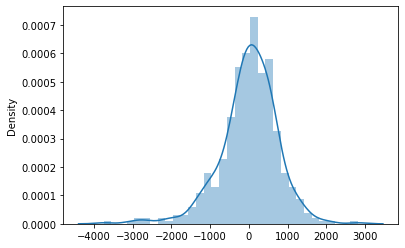

In [108]:
res = y_train - y_train_pred
sns.distplot(res)

- Error terms are normally distributed with mean zero (not X, Y)

### Predictions and Evaluation on the Test set

In [118]:
# Making Predictions Using the Final Model

# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

test_variables = ['temp', 'hum','atemp','windspeed']

df_test[test_variables] = scaler.transform(df_test[test_variables])

In [110]:
 df_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,1,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,1,0


In [111]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,20.808400,24.250312,61.934025,12.598352,4560.559091,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.654545,0.318182
std,0.500809,0.187620,0.459303,7.672796,8.281075,14.429542,4.973534,1904.968544,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.476601,0.466833
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   220 non-null    int64  
 1   holiday              220 non-null    int64  
 2   workingday           220 non-null    int64  
 3   temp                 220 non-null    float64
 4   atemp                220 non-null    float64
 5   hum                  220 non-null    float64
 6   windspeed            220 non-null    float64
 7   season_spring        220 non-null    uint8  
 8   season_summer        220 non-null    uint8  
 9   season_winter        220 non-null    uint8  
 10  mnth_August          220 non-null    uint8  
 11  mnth_December        220 non-null    uint8  
 12  mnth_February        220 non-null    uint8  
 13  mnth_January         220 non-null    uint8  
 14  mnth_July            220 non-null    uint8  
 15  mnth_June            220 non-null    u

In [113]:
y_test

184    6043
535    6211
299    2659
221    4780
152    4968
       ... 
702    6606
127    4333
640    7572
72     2046
653    7534
Name: cnt, Length: 220, dtype: int64

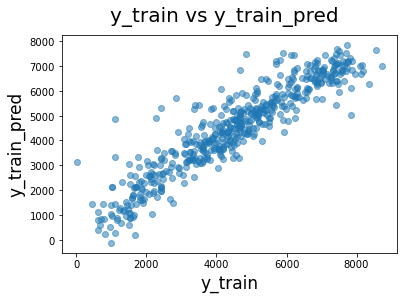

In [114]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred, alpha=.52)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 17)                          # X-label
plt.ylabel('y_train_pred', fontsize = 17) 
plt.show()

In [115]:
from sklearn.metrics import r2_score
r2=r2_score(y_train, y_train_pred)
r2

0.8525995845610338

In [116]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8301016264150863

## Conclusion:
On analysing data, it was observed that, the linear regression model was able to predict bike demand precisely with an R2 Score of more than 80%

Significant variables to predict the demand for shared bikes

    Season(Spring,Summer,Winter)
    months(January, July, September, November, December)
    Year (2019)
    weathersit( Light Snow, Mist Cloudy)
    holiday
    temp
    hum
    windspeed

